Predict Students' Dropout and Academic Success
==============================================

Source of the data: [10.24432/C5MC89](https://doi.org/10.24432/C5MC89)
([alternate URL](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)).

To do
-----

 * how to split to training and validation set? (imbalance!)
 * descriptive stats,
 * visualisations,
 * research questions,
 * try various classifiers, logistic regression, feature selection, feature engineering, etc.

Imports
-------

In [8]:
import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display as ipython_display

Utilities
---------

In [9]:
def println(*args, **kwargs):
    print(*args, **kwargs)
    print("")


def pprintln(title, *args, **kwargs):
    print(f"{title}:")
    kwargs.setdefault("indent", 2)
    pprint.pp(*args, **kwargs)
    print("")


plot_layout = (1, 1)
next_subplot = 0


def plt_layout(rows, cols, figsize):
    global plot_layout, next_subplot
    plot_layout = (rows, cols)
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    fig.tight_layout()
    next_subplot = 0


def plt_next(title):
    global plot_layout, next_subplot
    next_subplot += 1
    ax = plt.subplot(plot_layout[0], plot_layout[1], next_subplot)
    plt.title(title)

    return ax


def plt_hist(title, *args, **kwargs):
    plt_next(title)
    plt.hist(*args, **kwargs)


def plt_scatter(t1, t2, d1, d2, *args, **kwargs):
    ax = plt_next(f"{t1} vs. {t2}")
    ax.set_xlabel(t1)
    ax.set_ylabel(t2)
    plt.scatter(d1, d2, *args, **kwargs)


def plt_show():
    plt.show()
    next_subplot = 0


def invert_dict(dct):
    return dict((value, idx) for idx, value in dct.items())


def assign_numbers(data, col):
    mapping = invert_dict(dict(enumerate(sorted(data[col].unique()))))

    print(f"Renumbering {str(col)!r}")
    
    for k, v in sorted(((kk, vv) for kk, vv in mapping.items()), key=lambda x: x[0]):
        print(f"  {k:>10} --> {v}")

    return data[col].apply(lambda v: mapping[v])

Data
----

In [10]:
data = pd.read_csv("data/data.csv", sep=";")
ipython_display(data.head(10))

print(f"{data.shape = }")
print(f"{data[data.duplicated()].shape = }")
println(f"{np.sum(data.isnull().sum()) = }")

renumber = set([
    "Application mode",
    "Course",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Target",
])

for col in data.columns:
    dtype = str(data.dtypes[col])
    
    if col in renumber:
        data[col] = assign_numbers(data, col)
        
    print(f"{col:50} {dtype:10}")

    #if dtype == "int64":
    #    print(", ".join(str(u) for u in sorted(data[col].unique())))

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


data.shape = (4424, 37)
data[data.duplicated()].shape = (0, 37)
np.sum(data.isnull().sum()) = 0

Marital status                                     int64     
Renumbering 'Application mode'
           1 --> 0
           2 --> 1
           5 --> 2
           7 --> 3
          10 --> 4
          15 --> 5
          16 --> 6
          17 --> 7
          18 --> 8
          26 --> 9
          27 --> 10
          39 --> 11
          42 --> 12
          43 --> 13
          44 --> 14
          51 --> 15
          53 --> 16
          57 --> 17
Application mode                                   int64     
Application order                                  int64     
Renumbering 'Course'
          33 --> 0
         171 --> 1
        8014 --> 2
        9003 --> 3
        9070 --> 4
        9085 --> 5
        9119 --> 6
        9130 --> 7
        9147 --> 8
        9238 --> 9
        9254 --> 10
        9500 --> 11
        9556 --> 12
        9670 --> 13
        9773 --> 14
        9853 --> 15
     

Histograms
----------

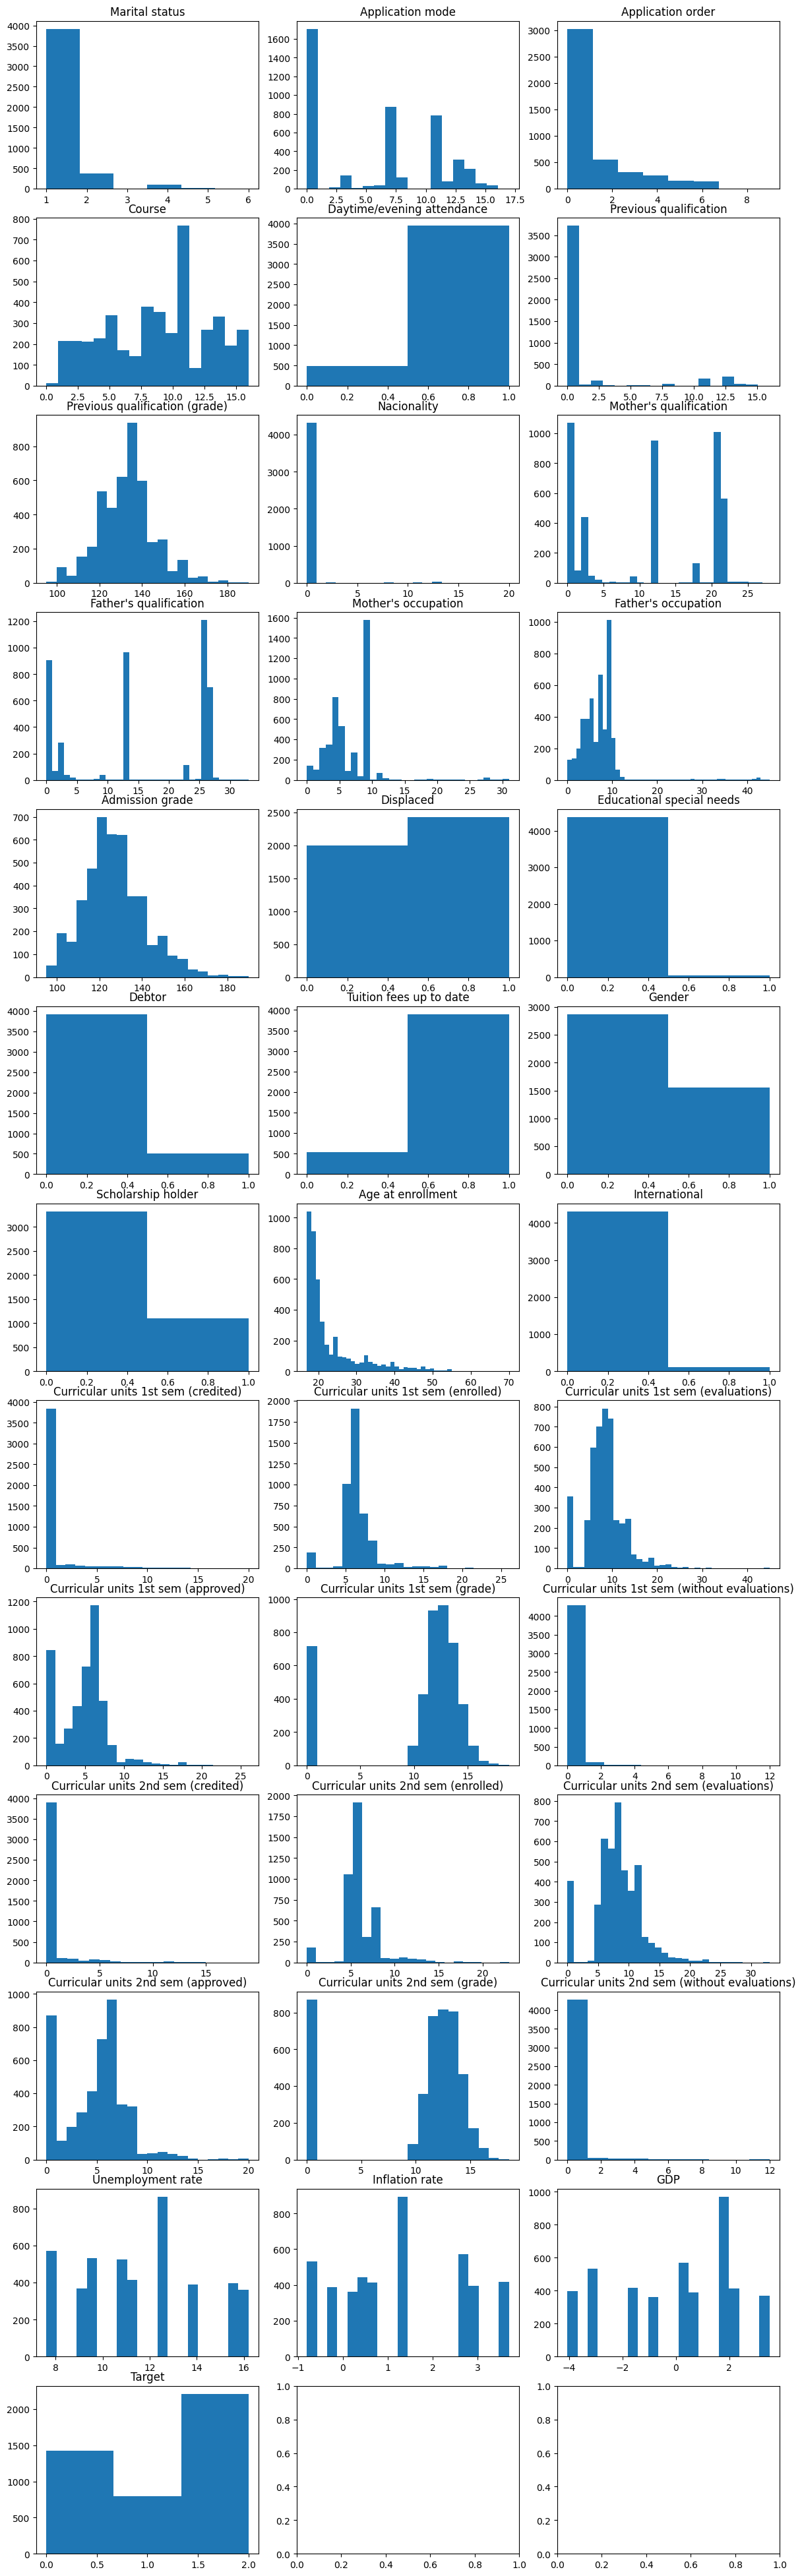

In [11]:
cols = 3
rows = int(len(data.columns) / cols) + 1

plt_layout(rows, cols, (12, rows * 3))

for col in data.columns:
    bins = 20 if str(data.dtypes[col]) != "int64" else len(data[col].unique())
    plt_hist(col, data[col], bins=bins)

Correlations
------------

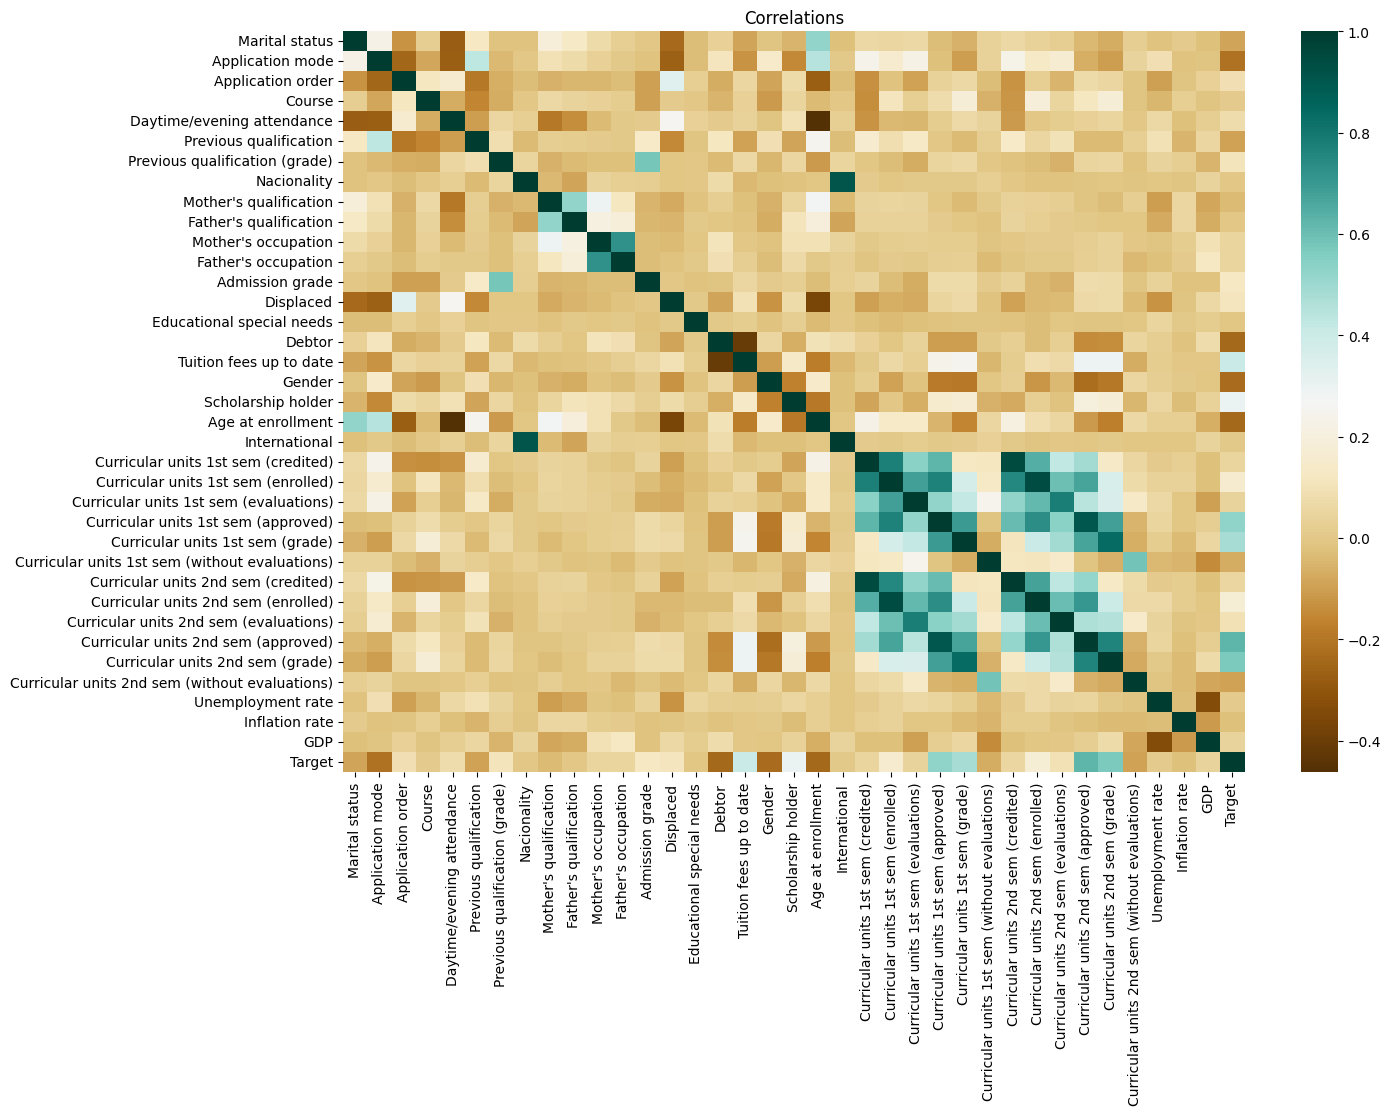

In [12]:
plt_layout(1, 1, (12, 8))
corr = data.corr()
plt.title("Correlations")
sns.heatmap(corr, cmap="BrBG", annot=False)
plt.show()